In [2]:
import pandas as pd
import requests 

get = "GEO_ID,NAME,NAICS2017,NAICS2017_LABEL,OWNER_SEX,OWNER_SEX_LABEL,OWNER_ETH,OWNER_ETH_LABEL,OWNER_RACE,OWNER_RACE_LABEL,OWNER_VET,OWNER_VET_LABEL,QDESC,QDESC_LABEL,OWNCHAR,OWNCHAR_LABEL,YEAR,OWNPDEMP,OWNPDEMP_F,OWNPDEMP_PCT,OWNPDEMP_PCT_F,OWNPDEMP_S,OWNPDEMP_S_F,OWNPDEMP_PCT_S,OWNPDEMP_PCT_S_F"

key = 'fd8c137d32e065e499223dba1534a3c5e7a52b91'

geography = 'state'

url = (f"https://api.census.gov/data/2018/abscbo?get={get}" +

        f"&for={geography}:" +

        f"*&key={key}")



r = requests.get(url)

data = r.text



owners = pd.read_json(data)



owners.columns = owners.iloc[0]

owners = owners[1:]
pd.set_option('display.max_columns', None)


get1 = "GEO_ID,NAME,NAICS2017,NAICS2017_LABEL,SEX,SEX_LABEL,ETH_GROUP,ETH_GROUP_LABEL,RACE_GROUP,RACE_GROUP_LABEL,VET_GROUP,VET_GROUP_LABEL,RCPSZFI_LABEL,EMPSZFI,EMPSZFI_LABEL,YEAR,FIRMPDEMP,FIRMPDEMP_F,RCPPDEMP,RCPPDEMP_F,EMP,EMP_F,PAYANN,PAYANN_F,FIRMPDEMP_S,FIRMPDEMP_S_F,RCPPDEMP_S,RCPPDEMP_S_F,EMP_S,EMP_S_F,PAYANN_S,PAYANN_S_F"

key = 'fd8c137d32e065e499223dba1534a3c5e7a52b91'

geography1 = 'state'

url1 = (f"https://api.census.gov/data/2018/abscs?get={get1}" +

        f"&for={geography1}:" +

        f"*&key={key}")



r1 = requests.get(url1)

data1 = r1.text



companies = pd.read_json(data1)



companies.columns = companies.iloc[0]

companies = companies[1:]
pd.set_option('display.max_columns', None)


owners.to_csv("owners.csv")
companies.to_csv("companies.csv")






In [ ]:
import pandas as pd
pd.set_option('display.max_columns', None)
owners = pd.read_csv('owners.csv', low_memory = False)
companies = pd.read_csv('companies.csv')

companies_clean = companies.drop(columns=["Unnamed: 0", "GEO_ID", "NAICS2017","SEX","ETH_GROUP", "RACE_GROUP", "VET_GROUP", "EMPSZFI","FIRMPDEMP_F", "FIRMPDEMP_F", "RCPPDEMP_F", "EMP_F", "PAYANN_F", "FIRMPDEMP_S_F", "RCPPDEMP_S_F", "EMP_S_F", "PAYANN_S_F"], axis=1)


owners_clean = owners.drop(columns=["Unnamed: 0", "GEO_ID", "NAICS2017","OWNER_SEX","OWNER_ETH", "OWNER_RACE", "OWNER_VET", "YEAR", "QDESC", "OWNCHAR", "OWNPDEMP_F", "OWNPDEMP_PCT_F","OWNPDEMP_S_F", "OWNPDEMP_PCT_S_F", "state"], axis=1)

owners_clean.to_csv("owners_clean.csv")
companies_clean.to_csv("companies_clean.csv")


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")
owners_clean = pd.read_csv('owners_clean.csv')
owners_clean.head()
owners_clean.shape

(5929, 13)

In [2]:
companies_clean = pd.read_csv('companies_clean.csv')
companies_clean.head()
companies_clean.shape

(261397, 19)

In [3]:
companies_clean.head()

,Unnamed: 0,NAME,NAICS2017_LABEL,SEX_LABEL,ETH_GROUP_LABEL,RACE_GROUP_LABEL,VET_GROUP_LABEL,RCPSZFI_LABEL,EMPSZFI_LABEL,YEAR,FIRMPDEMP,RCPPDEMP,EMP,PAYANN,FIRMPDEMP_S,RCPPDEMP_S,EMP_S,PAYANN_S,state
0,0,Mississippi,Total for all sectors,Total,Non-Hispanic,Total,Equally veteran/nonveteran,All firms,Firms with 1 to 4 employees,2018,0,0,0,0,0.0,0.0,0.0,0.0,28
1,1,Mississippi,Total for all sectors,Total,Non-Hispanic,Total,Equally veteran/nonveteran,All firms,Firms with 5 to 9 employees,2018,262,0,1742,43830,44.0,0.0,44.5,43.5,28
2,2,Mississippi,Total for all sectors,Total,Non-Hispanic,Total,Equally veteran/nonveteran,All firms,Firms with 10 to 19 employees,2018,0,0,0,0,0.0,0.0,0.0,0.0,28
3,3,Mississippi,Total for all sectors,Total,Non-Hispanic,Total,Equally veteran/nonveteran,All firms,Firms with 20 to 49 employees,2018,0,0,0,0,0.0,0.0,0.0,0.0,28
4,4,Mississippi,Total for all sectors,Total,Non-Hispanic,Total,Equally veteran/nonveteran,All firms,Firms with 50 to 99 employees,2018,0,0,0,0,0.0,0.0,0.0,0.0,28


In [4]:
owners_clean.head()

,Unnamed: 0,NAME,NAICS2017_LABEL,OWNER_SEX_LABEL,OWNER_ETH_LABEL,OWNER_RACE_LABEL,OWNER_VET_LABEL,QDESC_LABEL,OWNCHAR_LABEL,OWNPDEMP,OWNPDEMP_PCT,OWNPDEMP_S,OWNPDEMP_PCT_S
0,0,Mississippi,Total for all sectors,All owners of respondent firms,All owners of respondent firms,All owners of respondent firms,All owners of respondent firms,PRIORBUSTAT,Item not reported,1768,0.0,17.7,0.0
1,1,Mississippi,Total for all sectors,All owners of respondent firms,All owners of respondent firms,All owners of respondent firms,All owners of respondent firms,YRACQBUS,Before 1980,1158,4.6,20.3,0.9
2,2,Mississippi,Total for all sectors,All owners of respondent firms,All owners of respondent firms,All owners of respondent firms,All owners of respondent firms,YRACQBUS,1980 to 1989,1978,7.8,10.0,0.9
3,3,Mississippi,Total for all sectors,All owners of respondent firms,All owners of respondent firms,All owners of respondent firms,All owners of respondent firms,YRACQBUS,1990 to 1999,2983,11.8,11.7,1.0
4,4,Mississippi,Total for all sectors,All owners of respondent firms,All owners of respondent firms,All owners of respondent firms,All owners of respondent firms,YRACQBUS,2000 to 2007,5251,20.8,7.0,1.6


In [5]:
companies_clean.NAICS2017_LABEL.value_counts()

Total for all sectors                                                       44572
Professional, scientific, and technical services                            15082
Manufacturing                                                               14192
Accommodation and food services                                             13483
Retail trade                                                                13382
Health care and social assistance                                           13350
Administrative and support and waste management and remediation services    13101
Transportation and warehousing                                              12894
Construction                                                                12716
Wholesale trade                                                             12620
Information                                                                 11821
Other services (except public administration)                               11617
Real estate and 

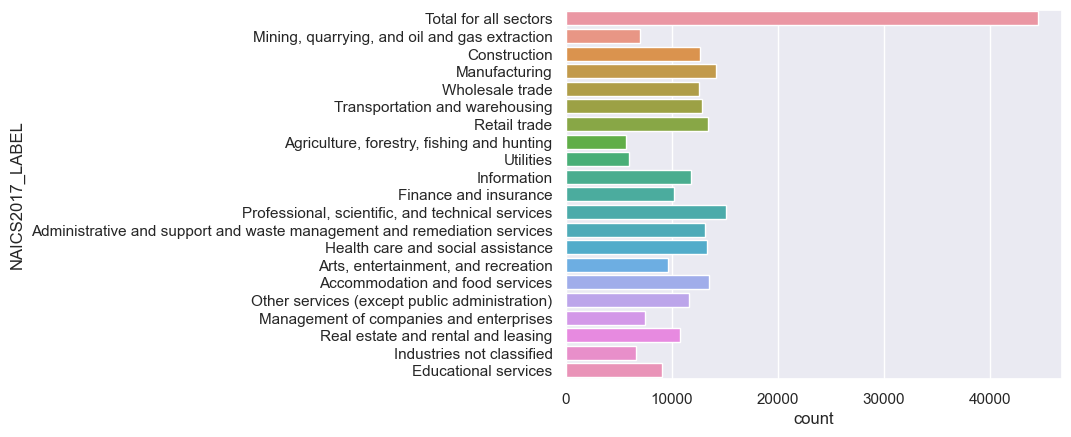

In [6]:
import seaborn as sns
sns.set(style="darkgrid")
ax = sns.countplot(y="NAICS2017_LABEL", data=companies_clean)

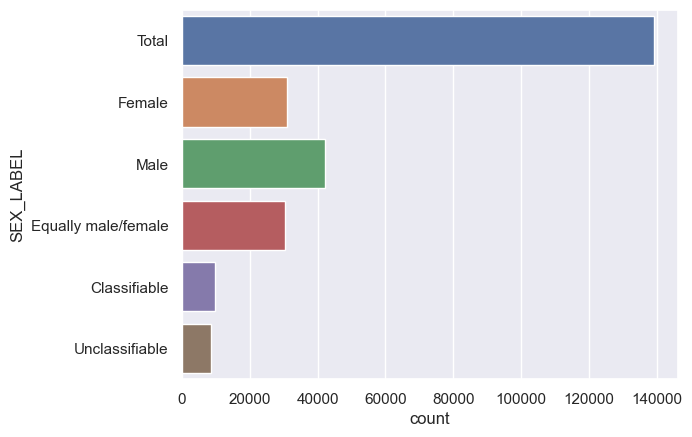

In [7]:
ax = sns.countplot(y="SEX_LABEL", data=companies_clean)

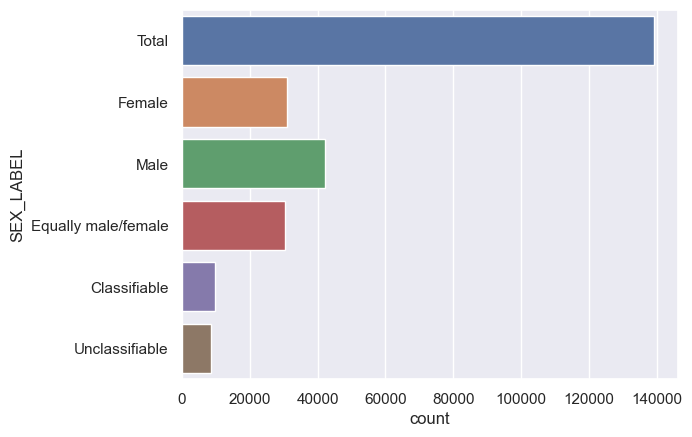

In [8]:
ax = sns.countplot(y="SEX_LABEL", data=companies_clean)

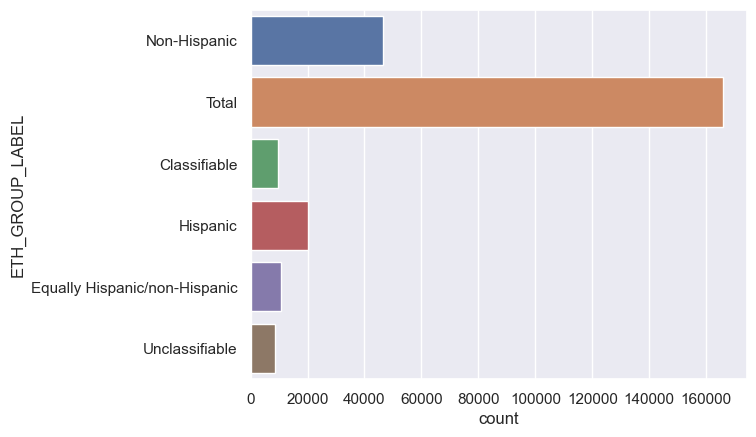

In [9]:
ax = sns.countplot(y="ETH_GROUP_LABEL", data=companies_clean)

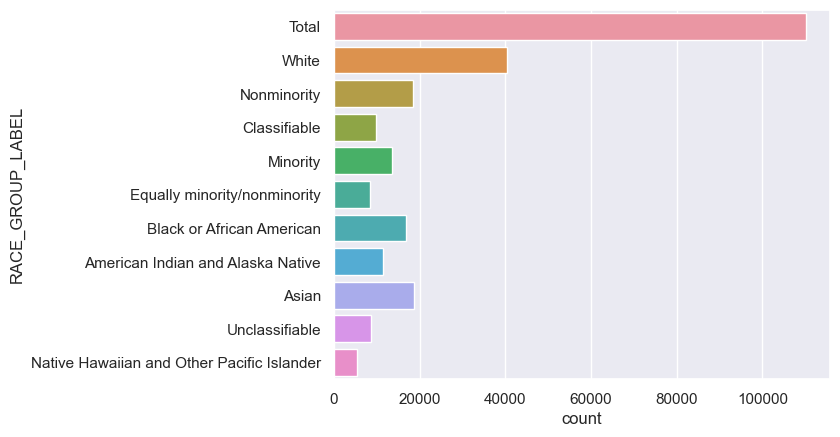

In [10]:
ax = sns.countplot(y="RACE_GROUP_LABEL", data=companies_clean)

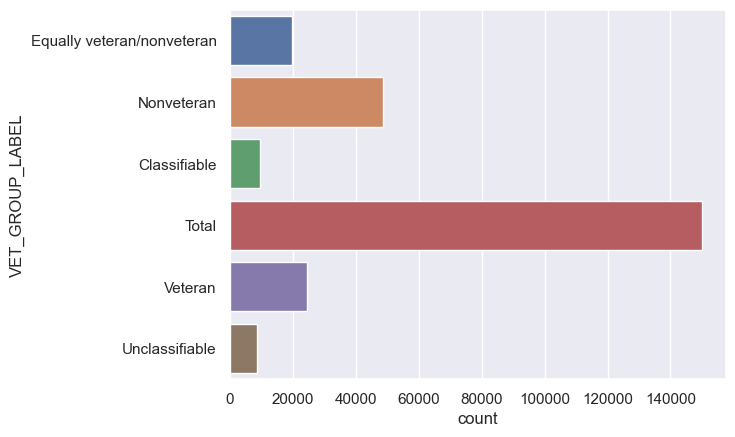

In [11]:
ax = sns.countplot(y="VET_GROUP_LABEL", data=companies_clean)

In [12]:
companies_clean.columns

Index(['Unnamed: 0', 'NAME', 'NAICS2017_LABEL', 'SEX_LABEL', 'ETH_GROUP_LABEL',
       'RACE_GROUP_LABEL', 'VET_GROUP_LABEL', 'RCPSZFI_LABEL', 'EMPSZFI_LABEL',
       'YEAR', 'FIRMPDEMP', 'RCPPDEMP', 'EMP', 'PAYANN', 'FIRMPDEMP_S',
       'RCPPDEMP_S', 'EMP_S', 'PAYANN_S', 'state'],
      dtype='object')

In [21]:
companies_clean.RCPSZFI_LABEL.value_counts()

All firms    261397
Name: RCPSZFI_LABEL, dtype: int64

ome visualization ideas are : comparing 
race & businesses revenue, 
location and revenue, 
gender and revenue, 
education status of business owner and revenue